In [1]:
library(ggplot2)
library(ggmap)
library(ggalt)


Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.


In [26]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
df = read.csv("Melbourne_housing_FULL-26-09-2017.csv")

In [5]:
dim(df)

[1] 23547    21

In [2]:
str(df)

'data.frame':	23547 obs. of  21 variables:
 $ Suburb       : Factor w/ 336 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address      : Factor w/ 23108 levels "1 Abercrombie St",..: 20002 22084 10427 6622 17071 15745 18380 5650 18185 23076 ...
 $ Rooms        : int  2 2 2 3 3 3 4 4 2 2 ...
 $ Type         : Factor w/ 3 levels "h","t","u": 1 1 1 3 1 1 1 1 1 1 ...
 $ Price        : int  NA 1480000 1035000 NA 1465000 850000 1600000 NA NA NA ...
 $ Method       : Factor w/ 9 levels "PI","PN","S",..: 7 3 3 8 6 1 8 5 3 3 ...
 $ SellerG      : Factor w/ 330 levels "@Realty","Abercromby's",..: 147 30 30 269 30 30 208 208 30 65 ...
 $ Date         : Factor w/ 58 levels "1/07/2017","10/09/2016",..: 44 46 48 48 49 49 50 52 52 52 ...
 $ Distance     : Factor w/ 212 levels "#N/A","0","0.7",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ Postcode     : Factor w/ 207 levels "#N/A","3000",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Bedroom2     : int  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom     : 

In [9]:
df$Date = as.Date(df$Date, format = "%d/%m/%Y")

In [10]:
head(df)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,2016-09-03,2.5,3067,⋯,1,1,126,NA,NA,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,⋯,1,1,202,NA,NA,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,⋯,1,0,156,79,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,2016-02-04,2.5,3067,⋯,2,1,0,NA,NA,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,⋯,2,0,134,150,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,⋯,2,1,94,NA,NA,Yarra,-37.7969,144.9969,Northern Metropolitan,4019


In [11]:
colSums(is.na(df))

Suburb       Address         Rooms          Type         Price 
            0             0             0             0          5151 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
         4481          4484          4626          6137         13529 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
        12007             0          4304          4304             0 
Propertycount 
            0

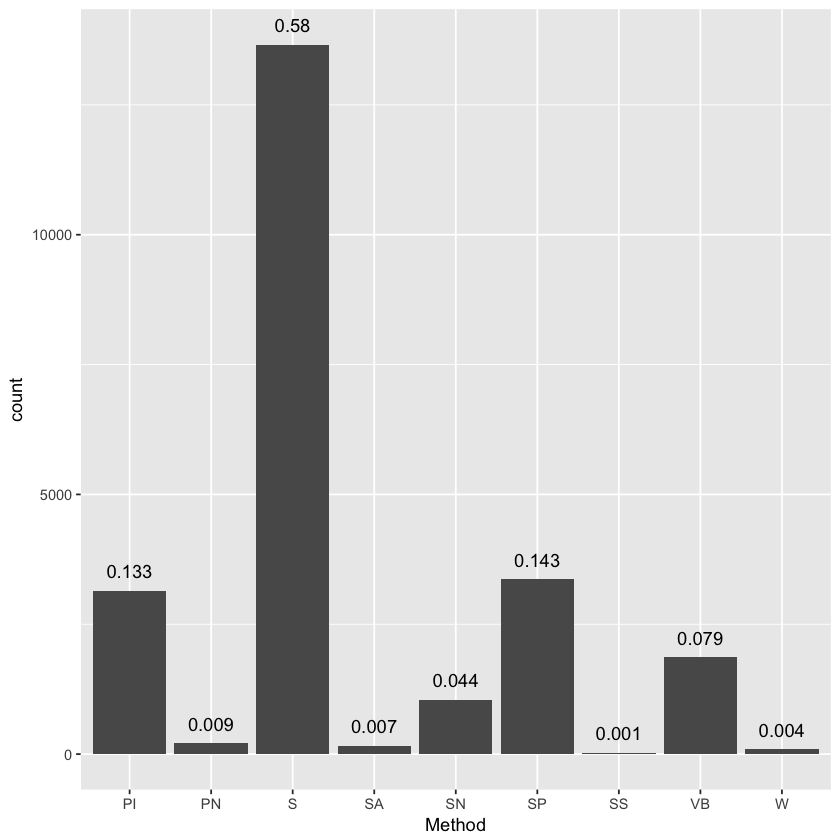

In [29]:
g <- ggplot(df, aes(x = Method,label = Method))
g + geom_bar() + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1)

S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

58% of the houses are sold (S) during the Auction  and another 14.3% prior to the auction(SP). 

13.3% are "Passed in"(PI) meaning not sold.

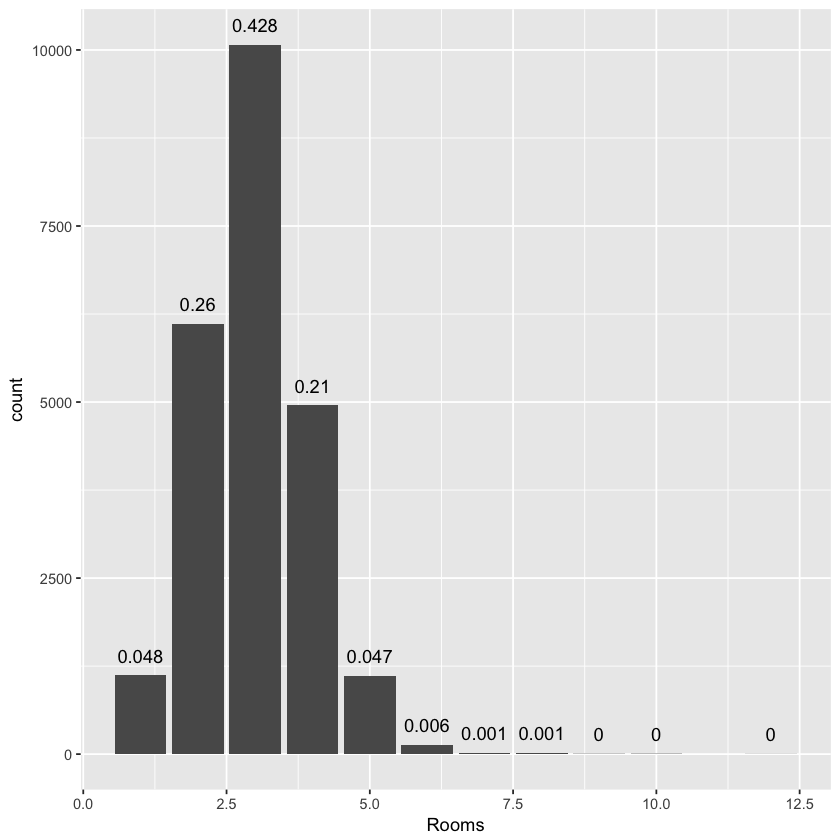

In [32]:
g <- ggplot(df, aes(x = Rooms,label = Method))
g + geom_bar() + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1)

Warning message:
“Removed 5151 rows containing missing values (geom_point).”

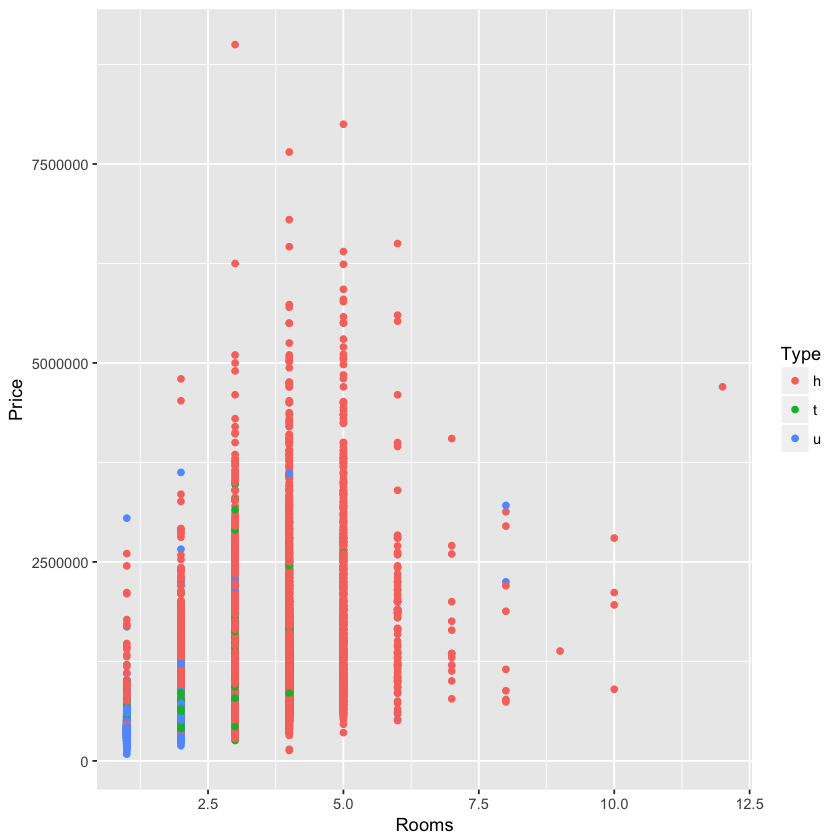

In [37]:
ggplot(df, aes(x = Rooms,y = Price, color=Type)) + geom_point()

In [2]:
melbourne <- geocode('Melbourne')

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Melbourne


In [3]:
melbourne_ggl_sat_map <- qmap('melbourne', zoom = 10, source = 'google', maptype= "roadmap")

Source : https://maps.googleapis.com/maps/api/staticmap?center=melbourne&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=melbourne


In [21]:
subs <- paste(unique(df$Suburb))

[1] 144.9958 144.9984 144.9934 145.0116 144.9944 144.9969 144.9941 144.9965
    [9] 144.9974 144.9989 144.9953 144.9993 144.9965 144.9936 144.9954       NA
   [17]       NA 144.9973 144.9989       NA 144.9972       NA       NA 145.0067
   [25] 144.9964 144.9965 144.9942       NA 144.9973 144.9988 144.9976 144.9959
   [33] 144.9930       NA       NA 144.9965 144.9975 145.0004 144.9952 144.9999
   [41] 144.9959 144.9965 144.9972 144.9977 144.9940       NA       NA 144.9941
   [49] 144.9988 145.0001 144.9965 144.9952       NA 144.9965 144.9969 144.9943
   [57] 144.9958 144.9961 144.9956 144.9954       NA 144.9976       NA 144.9946
   [65] 144.9942       NA 144.8780 144.8755 144.8755 144.8736 144.8880 144.8837
   [73] 144.8744 144.8864       NA       NA       NA       NA       NA 144.8872
   [81] 144.8792 144.8735 144.8710 144.8883       NA 144.8792 144.8728       NA
   [89] 144.8783       NA 144.8855       NA       NA       NA 144.8787       NA
   [97] 144.8699       NA 144.8870       NA 144.8760 144.8863 144.8742 144.8765
  [105] 144.8796 144.8835 144.8679       NA 144.8694 144.8792 144.8827       NA
  [113] 144.8802 144.8776 144.8733       NA 144.8820 144.8797 144.8824 144.8815
  [121] 144.8690       NA 144.8780       NA       NA       NA       NA       NA
  [129] 144.8785 144.8739       NA       NA       NA 144.9555 144.9538 144.9499
  [137] 144.9488 144.9530 144.9565 144.9561 144.9484 144.9521 144.9523 144.9536
  [145] 144.9598 144.9520       NA 144.9554 144.9579 144.9571 144.9515 144.9539
  [153] 144.9585 144.9557 144.9490 144.9511 144.9523 144.9506 144.9501 144.9481
  [161] 144.9590 144.9562 144.9575 144.9521 144.9479 144.9546 144.9551 144.9513
  [169] 144.9475 144.9578 144.9542 144.9545 144.9546 144.9518 144.9479 144.9539
  [177] 144.9528 144.9517 144.9558 144.9517 144.9493 144.9585 144.9500 144.9495
  [185]       NA 144.9488 144.9519 144.9588 144.9580 144.9450 144.9551 144.9453
  [193] 144.9577 144.9497 145.0198 145.0318 145.0325 145.0279       NA 145.0235
  [201]       NA 145.0310 145.0268 145.0208 145.0306 145.0308 145.0314       NA
  [209]       NA 145.0341 145.0288       NA       NA 145.0264 145.0316 145.0319
  [217] 145.0243 145.0314 145.0250 145.0262 145.0285 145.0283       NA       NA
  [225] 145.0290       NA 145.0225 145.0337 145.0284 145.0309 144.8250 144.8105
  [233] 144.8197 144.8375 144.8154 144.8190 144.8143 144.8171 144.8116 144.8170
  [241]       NA 144.8270 144.8249 144.8143 144.8182 144.8147 144.8185 144.8270
  [249] 144.8181 144.8384 144.8310 144.8155       NA 144.8160       NA 144.8286
  [257]       NA 144.8114 144.8202 144.8299 144.8287 144.8124 144.8268 144.8375
  [265] 144.8245 144.8170       NA 144.8172 144.8235 144.8150 144.8252 144.8387
  [273] 144.8220       NA 144.8185 144.8247 144.8129 144.8320 144.8285 144.8075
  [281] 144.8195 144.8365 144.8272 144.8480 144.8567 144.8350       NA       NA
  [289] 144.8500 144.8529 144.8562       NA 144.8355       NA 144.8368 144.8583
  [297]       NA       NA       NA 144.8555       NA 144.8378       NA       NA
  [305]       NA       NA 144.8529       NA       NA 144.8391 144.8500       NA
  [313]       NA 144.8602 144.8529       NA       NA       NA       NA       NA
  [321]       NA 144.8554 144.8523       NA       NA 144.8444       NA       NA
  [329]       NA       NA       NA       NA       NA       NA 144.8514 144.8530
  [337]       NA 144.8451 144.8455 144.8467 144.8443       NA 144.8385 144.8649
  [345] 144.8632       NA 144.8491 144.8553       NA 144.8388 144.8494       NA
  [353]       NA 144.8439       NA 144.8568 144.8541       NA       NA 144.8505
  [361] 144.8351 144.8649       NA       NA 145.0226 145.0262 145.0284 145.0160
  [369] 145.0135 145.0245       NA 145.0274 145.0167       NA       NA 145.0182
  [377] 145.0172 145.0127 145.0123       NA 145.0267 145.0222 145.0257 145.0281
  [385]       NA 145.0156 145.0160 145.0291 145.0111       NA 145.0229 145.0223
  [393] 145.0262 145.0268 145.0116 145.0113 145.0200 145.0184       NA 145.0198
  [4

In [43]:
melb_spots = paste(melbourne_spos)

Warning message in Ops.factor(melb_spots, " Melbourne"):
“‘+’ not meaningful for factors”

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA

In [45]:
subs = paste(unique(df$Suburb)," Melbourne",sep="")

In [47]:
places_loc = geocode(subs)

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Abbotsford%20Melbourne
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Abbotsford Melbourne"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Airport%20West%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Albert%20Park%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Alphington%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Altona%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Altona%20North%20Melbourne
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Altona North Melbourne"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Armadale%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Ascot%20Vale%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Ashburton%

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Preston%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Reservoir%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Richmond%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Rosanna%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Seddon%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=South%20Melbourne%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=South%20Yarra%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Southbank%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Spotswood%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=St%20Kilda%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Strathmore%20Melbourne
Warning message

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Clarinda%20Melbourne
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Clarinda Melbourne"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Clayton%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Clyde%20North%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Craigieburn%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Cranbourne%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Croydon%20Melbourne
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Croydon Melbourne"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Croydon%20Hills%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Croydon%20North%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Dandenong%20Melbou

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Tarneit%20Melbourne
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tarneit Melbourne"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Taylors%20Hill%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Taylors%20Lakes%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Tecoma%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Templestowe%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=The%20Basin%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Thomastown%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Truganina%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Tullamarine%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Vermont%20Melbourne
Sourc

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Footscray%20Lot%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Officer%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Olinda%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Waterways%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Beaconsfield%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Yarra%20Glen%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Brookfield%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Lysterfield%20Melbourne
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lysterfield Melbourne"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Plenty%20Melbourne
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Whittlesea%20Melbourne
Sour

Warning message:
“Removed 53 rows containing missing values (geom_point).”

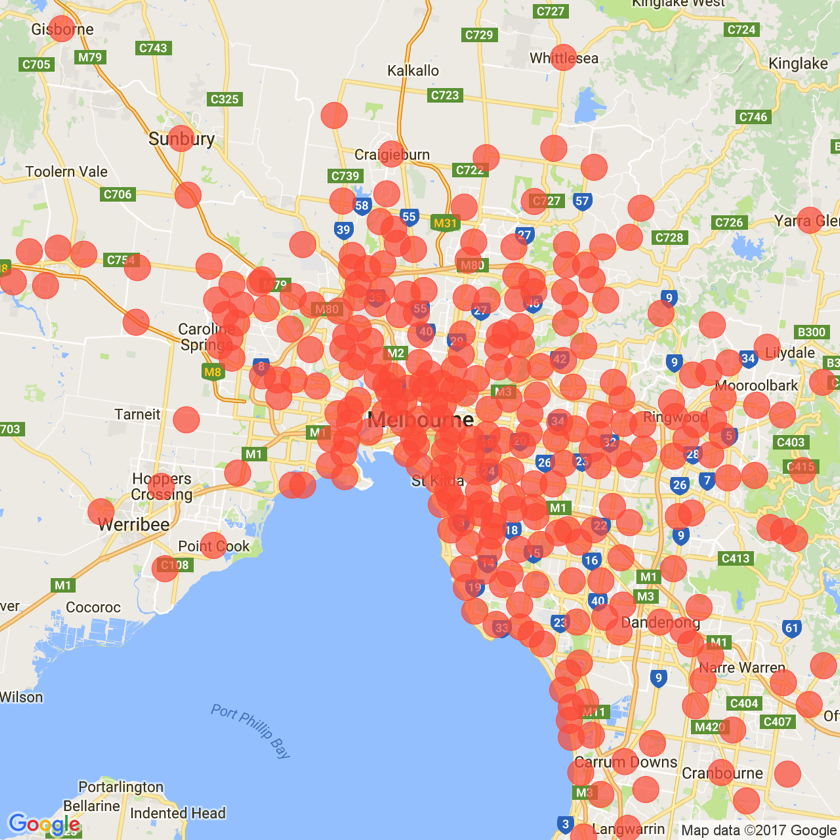

In [48]:
melbourne_ggl_sat_map + geom_point(aes(x=lon,y=lat),
                                   data = places_loc,
                                   alpha = 0.7,
                                   size = 7,
                                   color = 'tomato') 
    